In [1]:
import sys, os
import json
import torch

# Make sure src/ is visible
project_root = os.path.abspath(".")
if project_root not in sys.path:
    sys.path.append(project_root)

from src.config import config
from src.training.train import train_model

In [2]:
def build_config(overrides=None):
    cfg = config.copy()
    if overrides:
        cfg.update(overrides)
    return cfg

def show_config(cfg):
    for k, v in cfg.items():
        print(f"{k}: {v}")

In [3]:
import json
import os
import matplotlib.pyplot as plt

def plot_metrics(tokenizer_name: str, model_type: str, results_dir: str = "results"):
    """
    Load training metrics from JSON, plot training vs validation loss,
    auto-tighten the y-axis, and save the figure to results/pictures.
    """

    # ---- paths ----
    metrics_path = f"{results_dir}/metrics_{tokenizer_name}_{model_type}.json"
    pictures_dir = f"{results_dir}/pictures"
    os.makedirs(pictures_dir, exist_ok=True)

    # ---- load JSON ----
    with open(metrics_path, "r") as f:
        metrics = json.load(f)

    epochs = [m["epoch"] for m in metrics]
    train_losses = [m["train_loss"] for m in metrics]
    val_losses = [m["val_loss"] for m in metrics]

    # ---- plotting ----
    plt.figure(figsize=(7, 5))
    plt.plot(epochs, train_losses, marker="o", label="Train Loss")
    plt.plot(epochs, val_losses, marker="o", label="Validation Loss")

    # ---- tighten Y axis ----
    all_losses = train_losses + val_losses
    low = min(all_losses)
    high = max(all_losses)
    plt.ylim(low - 0.1, high * 2 + 3)

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training vs Validation Loss ({tokenizer_name}-{model_type})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # ---- save file ----
    out_path = f"{pictures_dir}/{tokenizer_name}_{model_type}.png"
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"Saved plot to: {out_path}")

In [4]:
def run_training(tokenizer_name, model_type, cfg):
    print("Starting training with config:")
    show_config(cfg)

    # Your train_model already prints metrics and saves files.
    train_model(
        tokenizer_name=tokenizer_name,
        model_type=model_type,
        cfg_overrides=cfg
    )

In [ ]:
!python -m src.tokenization.train_word

word transformer

In [5]:
tokenizer_name = "word"          
model_type = "transformer"       

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-3,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

word lstm

In [ ]:
tokenizer_name = "word"   
model_type = "lstm"       

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

bpe transformer

In [ ]:
tokenizer_name = "bpe"        
model_type = "transformer"     

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 5e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics("word", "transformer")
plot_metrics(tokenizer_name, model_type)

bpe lstm

In [ ]:
tokenizer_name = "bpe"      
model_type = "lstm"       

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

unigram transformer

In [ ]:
tokenizer_name = "unigram"       
model_type = "transformer"      

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 5e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

unigram lstm

In [ ]:
tokenizer_name = "unigram"    
model_type = "lstm"       

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

byte transformer

Starting training with config:
dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.001
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
new config
Starting training with tokenizer='byte', model_type='transformer'
pad:0
Loading Wiki2...
Loaded Wiki2: 10000 train, 3760 val Dataset({
    features: ['text'],
    num_rows: 4358
}) test
Building tokenized datasets and dataloaders...
Dataloaders ready. Starting epochs...
Epoch 0 starting...


byte-transformer epoch 0: 100%|█████████████████████████████████████████████████████████| 92290/92290 [17:16<00:00, 89.04it/s]


Epoch 0: train_loss=2.7088
Epoch 0:
  nll/token       = 1.5998 nats
  perplexity      = 4.9520
  bits per token  = 2.3080
  nll/char        = 1.6080 nats
  bits per char   = 2.3198 bits
  tokens per char = 1.0051
Saved checkpoint to checkpoints/byte_transformer_epoch0.pt
Epoch 1 starting...


byte-transformer epoch 1: 100%|████████████████████████████████████████████████████████| 92290/92290 [14:19<00:00, 107.37it/s]


Epoch 1: train_loss=2.3193
Epoch 1:
  nll/token       = 1.5871 nats
  perplexity      = 4.8894
  bits per token  = 2.2896
  nll/char        = 1.5952 nats
  bits per char   = 2.3014 bits
  tokens per char = 1.0051
Saved checkpoint to checkpoints/byte_transformer_epoch1.pt
Epoch 2 starting...


byte-transformer epoch 2: 100%|████████████████████████████████████████████████████████| 92290/92290 [12:24<00:00, 123.94it/s]


Epoch 2: train_loss=2.2895
Epoch 2:
  nll/token       = 1.5818 nats
  perplexity      = 4.8637
  bits per token  = 2.2821
  nll/char        = 1.5899 nats
  bits per char   = 2.2938 bits
  tokens per char = 1.0051
Saved checkpoint to checkpoints/byte_transformer_epoch2.pt
Epoch 3 starting...


byte-transformer epoch 3: 100%|████████████████████████████████████████████████████████| 92290/92290 [15:12<00:00, 101.11it/s]


Epoch 3: train_loss=2.2679
Epoch 3:
  nll/token       = 1.5866 nats
  perplexity      = 4.8873
  bits per token  = 2.2890
  nll/char        = 1.5948 nats
  bits per char   = 2.3008 bits
  tokens per char = 1.0051
Saved checkpoint to checkpoints/byte_transformer_epoch3.pt
Epoch 4 starting...


byte-transformer epoch 4: 100%|█████████████████████████████████████████████████████████| 92290/92290 [16:05<00:00, 95.55it/s]


Epoch 4: train_loss=2.2550
Epoch 4:
  nll/token       = 1.5848 nats
  perplexity      = 4.8785
  bits per token  = 2.2864
  nll/char        = 1.5930 nats
  bits per char   = 2.2982 bits
  tokens per char = 1.0051
Saved checkpoint to checkpoints/byte_transformer_epoch4.pt


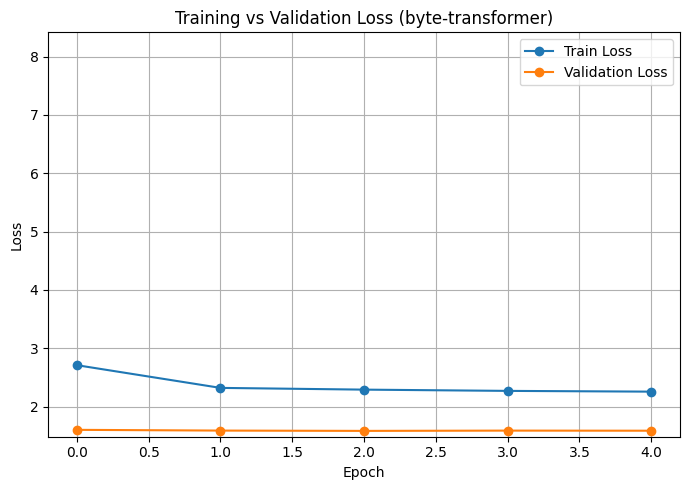

Saved plot to: results/pictures/byte_transformer.png


In [ ]:
tokenizer_name = "byte"         
model_type = "transformer"      

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-3,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
# show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

byte lstm

In [ ]:
tokenizer_name = "byte"         
model_type = "lstm"      

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

In [ ]:
tokenizers = ["word", "bpe", "unigram", "byte"]
model_types = ["transformer", "lstm"]

for tok in tokenizers:
    for model in model_types:
        print(f"Plotting {tok}-{model}...")
        plot_metrics(tok, model)   # uses your previous function